# Explore here

In [2]:
import pandas as pd

# Configuración
file_id = '1e_DPPpXy0zddc0A1ARU4fx1hO_ZHc1Tn'
url = f'https://drive.google.com/uc?id={file_id}&export=download'

# Carga el DataFrame con parámetros para mejor manejo de datos
try:
    df = pd.read_csv(url)
    
    # Verificación básica
    print(f"¡Archivo cargado correctamente! Dimensiones: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())
    
    print("\nResumen estadístico:")
    print(df.describe())
    
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    print("\nSolución alternativa:")
    print("1. Verifica que el archivo esté compartido como 'Cualquier persona con el enlace'")
    print("2. Si el archivo es muy grande, usa: df = pd.read_csv(url, chunksize=10000)")

¡Archivo cargado correctamente! Dimensiones: (48052, 2)

Primeras 5 filas:
                                        ComentarioEs sentimiento
0  Uno de los otros crÃ­ticos ha mencionado que d...    positivo
1  Una pequeÃ±a pequeÃ±a producciÃ³n.La tÃ©cnica ...    positivo
2  PensÃ© que esta era una manera maravillosa de ...    positivo
3  BÃ¡sicamente, hay una familia donde un niÃ±o p...    negativo
4  El """"amor en el tiempo"""" de Petter Mattei ...    positivo

Resumen estadístico:
                                             ComentarioEs sentimiento
count                                               48051       48051
unique                                              48051           2
top     Uno de los otros crÃ­ticos ha mencionado que d...    negativo
freq                                                    1       24041


Vamos a cambiar a unicodedata.normalize("NFKC", text) para trabajar con tildes y "ñ" en español, con un texto completamente normalizado.

In [3]:
import unicodedata

def normalize_text(text):
    if isinstance(text, str):
        # Normalizar el texto y asegurar codificación consistente
        return unicodedata.normalize("NFKC", text)
    else:
        return text  # Si no es texto, lo devuelve tal cual (evita errores en números, etc.)

# Aplicar a todas las columnas de tipo 'object' (strings)
df = df.apply(lambda col: col.map(normalize_text) if col.dtype == 'object' else col)

# Mostrar las primeras filas para verificar
df

,ComentarioEs,sentimiento
0,Uno de los otros crÃ­ticos ha mencionado que d...,positivo
1,Una pequeÃ±a pequeÃ±a producciÃ3n.La tÃ©cnica ...,positivo
2,PensÃ© que esta era una manera maravillosa de ...,positivo
3,"BÃ¡sicamente, hay una familia donde un niÃ±o p...",negativo
4,"El """"""""amor en el tiempo"""""""" de Petter Mattei ...",positivo
...,...,...
48047,PensÃ© que esta pelÃ­cula hizo un buen trabajo...,positivo
48048,"Mala parcela, mal diÃ¡logo, mala actuaciÃ3n, d...",negativo
48049,Soy catÃ3lica enseÃ±ada en escuelas primarias ...,negativo
48050,Voy a tener que estar en desacuerdo con el com...,negativo


Verifiquemos si tenemos un dataset balanceado

In [4]:
print(len(df[df['sentimiento']=="positivo"]))
print(len(df[df['sentimiento']=="negativo"]))

24010
24041


Eliminemos valores Nulos

In [5]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,ComentarioEs,sentimiento
0,Uno de los otros crÃ­ticos ha mencionado que d...,positivo
1,Una pequeÃ±a pequeÃ±a producciÃ3n.La tÃ©cnica ...,positivo
2,PensÃ© que esta era una manera maravillosa de ...,positivo
3,"BÃ¡sicamente, hay una familia donde un niÃ±o p...",negativo
4,"El """"""""amor en el tiempo"""""""" de Petter Mattei ...",positivo
...,...,...
48046,PensÃ© que esta pelÃ­cula hizo un buen trabajo...,positivo
48047,"Mala parcela, mal diÃ¡logo, mala actuaciÃ3n, d...",negativo
48048,Soy catÃ3lica enseÃ±ada en escuelas primarias ...,negativo
48049,Voy a tener que estar en desacuerdo con el com...,negativo


Transformemos nuestras dos categorias negativo y positivo en valores numéricos (0 y 1)

In [6]:
df["sentimiento"] = df["sentimiento"].apply(lambda x: 1 if x == "positivo" else 0).astype(int)
df.head()

,ComentarioEs,sentimiento
0,Uno de los otros crÃ­ticos ha mencionado que d...,1
1,Una pequeÃ±a pequeÃ±a producciÃ3n.La tÃ©cnica ...,1
2,PensÃ© que esta era una manera maravillosa de ...,1
3,"BÃ¡sicamente, hay una familia donde un niÃ±o p...",0
4,"El """"""""amor en el tiempo"""""""" de Petter Mattei ...",1


vamos a ajustar las tildes

In [7]:
# Diccionario de reemplazos (caracter mal codificado → caracter correcto)
reemplazos = {
    r'Ã±': 'ñ',    # ñ
    r'Ã¡': 'á',    # á
    r'Ã©': 'é',    # é
    r'Ã3': 'ó',    # ó
    r'Ã­': 'í',     # í
    r'Ãº': 'ú',    # ú 
    r'Ã¼': 'ü',    # ü (por si acaso)
    }

# Aplicar reemplazo en todas las columnas de tipo string
for columna in df.select_dtypes(include=['object']).columns:
    df[columna] = df[columna].str.replace('|'.join(reemplazos.keys()), 
                                         lambda x: reemplazos[x.group()], 
                                         regex=True)
df

,ComentarioEs,sentimiento
0,Uno de los otros críticos ha mencionado que de...,1
1,Una pequeña pequeña producción.La técnica de f...,1
2,Pensé que esta era una manera maravillosa de p...,1
3,"Básicamente, hay una familia donde un niño peq...",0
4,"El """"""""amor en el tiempo"""""""" de Petter Mattei ...",1
...,...,...
48046,Pensé que esta película hizo un buen trabajo a...,1
48047,"Mala parcela, mal diálogo, mala actuación, dir...",0
48048,Soy católica enseñada en escuelas primarias pa...,0
48049,Voy a tener que estar en desacuerdo con el com...,0


Pasamos todo el texto a minusculas

In [8]:
df = df.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)
df

,ComentarioEs,sentimiento
0,uno de los otros críticos ha mencionado que de...,1
1,una pequeña pequeña producción.la técnica de f...,1
2,pensé que esta era una manera maravillosa de p...,1
3,"básicamente, hay una familia donde un niño peq...",0
4,"el """"""""amor en el tiempo"""""""" de petter mattei ...",1
...,...,...
48046,pensé que esta película hizo un buen trabajo a...,1
48047,"mala parcela, mal diálogo, mala actuación, dir...",0
48048,soy católica enseñada en escuelas primarias pa...,0
48049,voy a tener que estar en desacuerdo con el com...,0


Procesamiento del texto

Para poder entrenar el modelo es necesario aplicar antes un proceso de transformación al texto. ya lo tenemos en minusculas, ahora eliminaremos signos de puntuación y caracteres especiales:

In [9]:
import regex as re

def preprocess_text(text):
    # Permitir letras (incluyendo acentuadas y ñ), espacios y algunos símbolos básicos
    text = re.sub(r'[^\wáéíóúüñÁÉÍÓÚÜÑ ]', " ", text, flags=re.UNICODE)
    
    # Eliminar palabras de una sola letra rodeadas por espacios
    text = re.sub(r'\s+[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]\s+', " ", text)
    text = re.sub(r'^\s*[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]\s+', " ", text)
    text = re.sub(r'\s+[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]\s*$', " ", text)

    # Reducir espacios múltiples y convertir a minúsculas
    text = re.sub(r'\s+', " ", text.lower()).strip()
    
    # Eliminar tags (opcional, si aún es necesario)
    text = re.sub(r'&lt;/?.*?&gt;', " ", text)
    
    return text.split()

# Aplicar la función
df["ComentarioEs"] = df["ComentarioEs"].apply(preprocess_text)
df

,ComentarioEs,sentimiento
0,"[uno, de, los, otros, críticos, ha, mencionado...",1
1,"[una, pequeña, pequeña, producción, la, técnic...",1
2,"[pensé, que, esta, era, una, manera, maravillo...",1
3,"[básicamente, hay, una, familia, donde, un, ni...",0
4,"[el, amor, en, el, tiempo, de, petter, mattei,...",1
...,...,...
48046,"[pensé, que, esta, película, hizo, un, buen, t...",1
48047,"[mala, parcela, mal, diálogo, mala, actuación,...",0
48048,"[soy, católica, enseñada, en, escuelas, primar...",0
48049,"[voy, tener, que, estar, en, desacuerdo, con, ...",0


El siguiente paso es la lematización del texto, que es el proceso de simplificación de las palabras a su forma base o canónica, de manera que palabras con diferentes formas, pero el mismo núcleo semántico, se traten como una sola palabra. Por ejemplo, los verbos "corriendo", "corrió" y "corre" serán lematizados a "correr", así como las palabras "mejores" y "mejor" podrían ser lematizadas a "bueno".

In [10]:
import spacy
from tqdm import tqdm

# Configurar tqdm para pandas
tqdm.pandas(desc="Procesando textos")

# Cargar el modelo (después de instalarlo)
nlp = spacy.load("es_core_news_sm")

def lematizar_texto_es(words):
    if isinstance(words, list):  # Asegurar que 'words' sea una lista
        doc = nlp(" ".join(words))
        tokens = [token.lemma_ for token in doc if not token.is_stop and len(token.text) > 3]
        return tokens
    return []  # Si no es una lista, devolver lista vacía

# Aplicar la función a la columna con una barra y porcentaje de progreso
df["ComentarioEs"] = df["ComentarioEs"].progress_apply(lematizar_texto_es)
df

Procesando textos: 100%|██████████| 48051/48051 [21:20<00:00, 37.53it/s]


,ComentarioEs,sentimiento
0,"[crítico, mencionar, episodio, enganchado, raz...",1
1,"[pequeño, pequeño, producción, técnica, filmac...",1
2,"[pensar, maravilloso, pasar, tiempo, semana, v...",1
3,"[básicamente, familia, niño, pequeño, jake, pe...",0
4,"[amor, tiempo, petter, mattei, película, visua...",1
...,...,...
48046,"[pensar, película, trabajo, derecha, creativo,...",1
48047,"[malo, parcela, diálogo, malo, actuación, dire...",0
48048,"[católico, enseñado, escuela, primario, parroq...",0
48049,"[desacuerdo, comentario, maltin, caso, tasa, o...",0


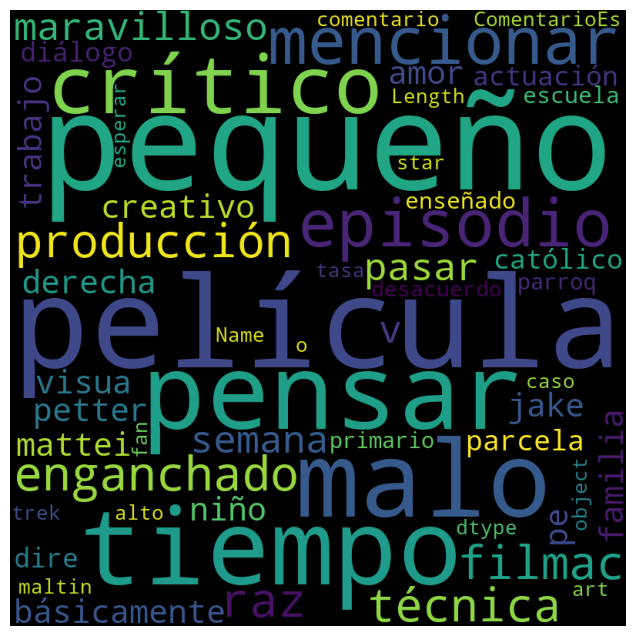

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df["ComentarioEs"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ahora eliminaremos las stopwords, que son palabras que consideramos irrelevantes para el análisis de texto porque aparece con mucha frecuencia en el lenguaje y no aporta información significativa utilizando la libreria nltk y convertiremos en numeros el df para poder construir el modelo:

Utilizaremos una versión que sea optima para analisis de sentimiento de acuerdo a las siguientes observaciones:

Trabajas con texto en español (las stopwords son esenciales)

El contexto de palabras es importante (n-gramas capturan frases)

Quieres mayor granularidad (15k features vs 5k)

Prefieres eficiencia en memoria (matriz sparse)

Buscas mejor rendimiento en análisis de sentimiento (sublinear_tf ayuda)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Descargar stopwords
nltk.download('stopwords')

# Convertir stopwords a LISTA (no set)
stop_words_es = list(stopwords.words('spanish'))

# Configuración de TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=15_000,
    ngram_range=(1, 3),
    stop_words=stop_words_es,  # Ahora es una lista válida
    sublinear_tf=True
)

# Procesamiento del corpus
corpus = df["ComentarioEs"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
x = tfidf.fit_transform(corpus)
y = df["sentimiento"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jklmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size=0.2,
    random_state=42,  # Para reproducibilidad
    )

# Verificar formas
print(f"Train shapes: {X_train.shape}, {y_train.shape}")
print(f"Test shapes: {X_test.shape}, {y_test.shape}")

Train shapes: (38440, 15000), (38440,)
Test shapes: (9611, 15000), (9611,)


### Configuración del Modelo SVM

Se implementa un **clasificador SVM (Máquina de Vectores de Soporte)** con los siguientes parámetros clave:

- **`kernel='linear'`**:  
  Utiliza un kernel lineal, ideal para datos de alta dimensionalidad como texto vectorizado (TF-IDF), ya que es eficiente y ofrece buen rendimiento en problemas de clasificación de texto.

- **`probability=True`** (Obligatorio):  
  Habilita el cálculo de probabilidades para cada predicción, permitiendo obtener:
  - Tasa de confianza (%)
  - Probabilidades individuales para cada clase (positivo/negativo)

- **`random_state=42`**:  
  Garantiza reproducibilidad en los resultados al fijar la semilla aleatoria.

Este modelo será entrenado con datos vectorizados para clasificar sentimientos y generar predicciones interpretables con sus respectivas probabilidades.

In [22]:
from sklearn.svm import SVC

# 1. Configurar el modelo con parámetros clave
modelo = SVC(
    kernel='linear',      # Kernel lineal (ideal para texto)
    probability=True,     # ¡Obligatorio para obtener probabilidades!
    random_state=42      # Reproducibilidad
)

# 2. Entrenar el modelo
modelo.fit(X_train, y_train)
print("Modelo entrenado con éxito.")

Modelo entrenado con éxito.


Estimar predicciones y calcular probabilidades de cada predicción

In [23]:
import numpy as np

# Obtener predicciones y probabilidades
y_pred = modelo.predict(X_test)
probabilidades = modelo.predict_proba(X_test)

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Predicción': y_pred,
    'Probabilidad_Negativo': probabilidades[:, 0].round(4),  # 4 decimales
    'Probabilidad_Positivo': probabilidades[:, 1].round(4),
    'Confianza': np.max(probabilidades, axis=1).round(4)  # Máxima probabilidad
})

# Mostrar tabla
print(resultados.head(10))  # Primeras 10 filas


   Predicción  Probabilidad_Negativo  Probabilidad_Positivo  Confianza
0           1                 0.2154                 0.7846     0.7846
1           0                 0.5657                 0.4343     0.5657
2           1                 0.0377                 0.9623     0.9623
3           0                 0.9030                 0.0970     0.9030
4           0                 0.9980                 0.0020     0.9980
5           0                 0.7716                 0.2284     0.7716
6           1                 0.0157                 0.9843     0.9843
7           1                 0.1748                 0.8252     0.8252
8           1                 0.4880                 0.5120     0.5120
9           0                 0.9938                 0.0062     0.9938


In [24]:
# 4. Evaluar el modelo
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Evaluación del modelo:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Evaluación del modelo:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4759
           1       0.88      0.88      0.88      4852

    accuracy                           0.88      9611
   macro avg       0.88      0.88      0.88      9611
weighted avg       0.88      0.88      0.88      9611

Accuracy: 0.8787847258349808
Matriz de confusión:
[[4164  595]
 [ 570 4282]]


In [25]:
from pickle import dump
# Guardar el modelo entrenado
dump(modelo,open('../models/svm_classifier_linear_probabilityTrue_42.sav','wb'))


In [ ]:
#Optimizar modelo de SVM

Ahora veremos como se comporta una regresión logistica


Ejemplo de predicciones con confianza:
   Predicción  Probabilidad_Negativo  Probabilidad_Positivo  Confianza
0           1                  37.17                  62.83      62.83
1           0                  56.78                  43.22      56.78
2           1                  20.29                  79.71      79.71
3           0                  78.98                  21.02      78.98
4           0                  97.82                   2.18      97.82
5           0                  68.87                  31.13      68.87
6           1                   7.87                  92.13      92.13
7           1                  21.30                  78.70      78.70
8           0                  52.57                  47.43      52.57
9           0                  96.84                   3.16      96.84

Accuracy del modelo regresión Logistica: 88.09%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     

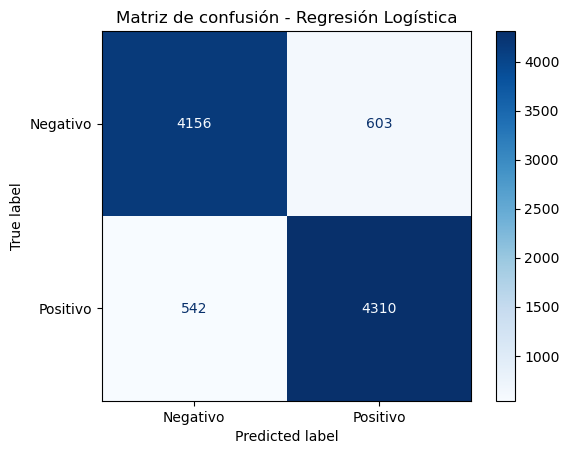

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np

# Crear y entrenar el modelo
ModeloRegresionLogistica = LogisticRegression(random_state=42, max_iter=1000)
ModeloRegresionLogistica.fit(X_train, y_train)

# Obtener predicciones Y probabilidades
y_pred = ModeloRegresionLogistica.predict(X_test)
y_proba = ModeloRegresionLogistica.predict_proba(X_test)  # Probabilidades para cada clase

# Crear DataFrame con resultados detallados
resultados = pd.DataFrame({
    'Predicción': y_pred,
    'Probabilidad_Negativo': y_proba[:, 0].round(4) * 100,  # Convertir a porcentaje
    'Probabilidad_Positivo': y_proba[:, 1].round(4) * 100,
    'Confianza': np.max(y_proba, axis=1).round(4) * 100  # Máxima probabilidad (%)
})

# Mostrar las primeras predicciones con probabilidades
print("\nEjemplo de predicciones con confianza:")
print(resultados.head(10))

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del modelo regresión Logistica: {accuracy:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negativo", "Positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

Busquemos hiperparametros al modelo de regresión logistica

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'C': 1, 'penalty': 'l2'}

Ejemplo de predicciones con confianza:
   Predicción  Probabilidad_Negativo  Probabilidad_Positivo  Confianza
0           1                  37.19                  62.81      62.81
1           0                  56.78                  43.22      56.78
2           1                  20.30                  79.70      79.70
3           0                  79.00                  21.00      79.00
4           0                  97.83                   2.17      97.83
5           0                  68.87                  31.13      68.87
6           1                   7.87                  92.13      92.13
7           1                  21.31                  78.69      78.69
8           0                  52.55                  47.45      52.55
9           0                  96.84                   3.16      96.84
Accuracy del modelo de Regresión Logística (ajustado): 88.09%

Repo

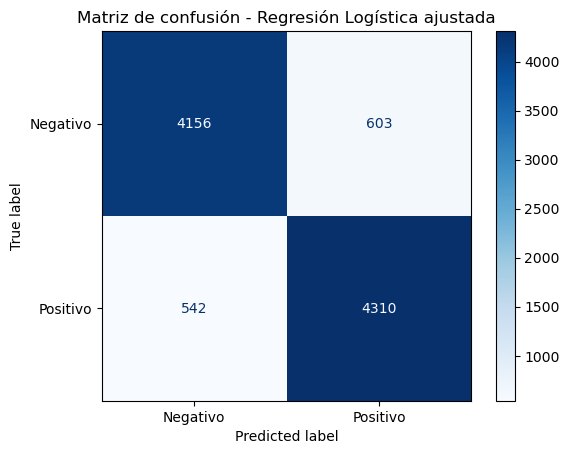

In [31]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de regresión logística
ModeloRegresionLogistica = LogisticRegression(solver='liblinear', random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'penalty': ['l1', 'l2'],       # Penalización Lasso (l1) o Ridge (l2)
}

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=ModeloRegresionLogistica, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el mejor modelo con los hiperparámetros encontrados
bestModeloRegresionLogistica = grid_search.best_estimator_
y_pred = bestModeloRegresionLogistica.predict(X_test)
y_proba = bestModeloRegresionLogistica.predict_proba(X_test)  # Probabilidades para cada clase

# Crear DataFrame con resultados detallados
resultados = pd.DataFrame({
    'Predicción': y_pred,
    'Probabilidad_Negativo': y_proba[:, 0].round(4) * 100,  # Convertir a porcentaje
    'Probabilidad_Positivo': y_proba[:, 1].round(4) * 100,
    'Confianza': np.max(y_proba, axis=1).round(4) * 100  # Máxima probabilidad (%)
})

# Mostrar las primeras predicciones con probabilidades
print("\nEjemplo de predicciones con confianza:")
print(resultados.head(10))

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de Regresión Logística (ajustado): {accuracy:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión y su gráfica
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negativo", "Positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Regresión Logística ajustada")
plt.show()

In [32]:
#Guardamos el modelo de regresión logística ajustado
dump(bestModeloRegresionLogistica, open('../models/regresion_logistica_ajustada.sav', 'wb'))


Ejemplo de predicciones con confianza:
   Predicción  Probabilidad_Negativo  Probabilidad_Positivo  Confianza
0           0                   53.0                   47.0       53.0
1           0                   63.0                   37.0       63.0
2           1                   36.0                   64.0       64.0
3           0                   83.0                   17.0       83.0
4           0                   79.0                   21.0       79.0
5           0                   75.0                   25.0       75.0
6           1                   26.0                   74.0       74.0
7           1                   36.0                   64.0       64.0
8           0                   55.0                   45.0       55.0
9           0                   83.0                   17.0       83.0
Accuracy del modelo Random Forest: 83.14%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      4759
 

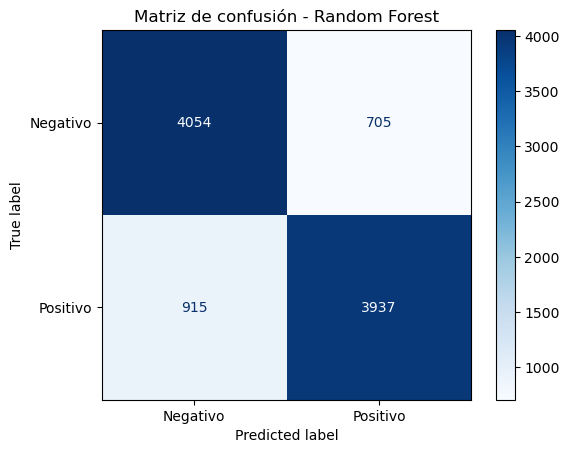

In [34]:
#Intentaremos obtener resultados con un RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Crear el modelo Random Forest
random_forest_model = RandomForestClassifier(
    n_estimators=100,  # Número de árboles
    max_depth=None,    # Sin límite para la profundidad
    random_state=42    # Para reproducibilidad
)

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = random_forest_model.predict(X_test)
y_proba = random_forest_model.predict_proba(X_test)  # Probabilidades para cada clase

# Crear DataFrame con resultados detallados
resultados = pd.DataFrame({
    'Predicción': y_pred,
    'Probabilidad_Negativo': y_proba[:, 0].round(4) * 100,  # Convertir a porcentaje
    'Probabilidad_Positivo': y_proba[:, 1].round(4) * 100,
    'Confianza': np.max(y_proba, axis=1).round(4) * 100  # Máxima probabilidad (%)
})
# Mostrar las primeras predicciones con probabilidades
print("\nEjemplo de predicciones con confianza:")
print(resultados.head(10))

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest: {accuracy:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión y su gráfica
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negativo", "Positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Random Forest")
plt.show()

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Ejemplo de predicciones con confianza:
   Predicción  Probabilidad_Negativo  Probabilidad_Positivo  Confianza
0           1                  49.97                  50.03      50.03
1           0                  62.96                  37.04      62.96
2           1                  39.74                  60.26      60.26
3           0                  74.08                  25.92      74.08
4           0                  81.52                  18.48      81.52
5           0                  76.17                  23.83      76.17
6           1                  24.91                  75.09      75.09
7           1                  37.72                  62.28      62.28
8           0                  55.26                  44.74      55.26
9           0                  78.06                 

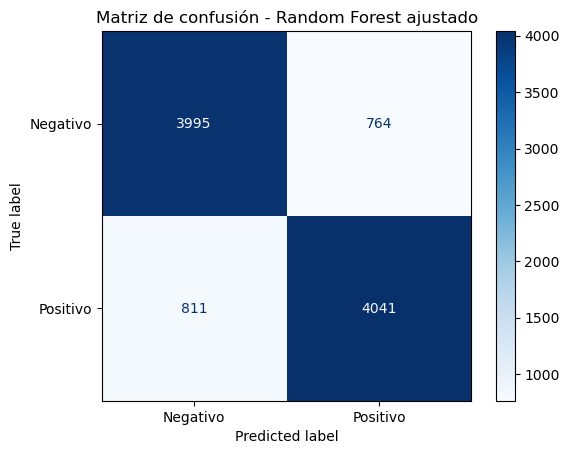

In [35]:
#Hagamos busqueda de hiperparámetros para el RandomForest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Crear el modelo base de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],  # Cantidad de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
    'bootstrap': [True, False]  # Muestreo con reemplazo
}

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,  # Paralelización total
    verbose=1
)
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el mejor modelo con los hiperparámetros seleccionados
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)  # Probabilidades para cada clase

# Crear DataFrame con resultados detallados
resultados = pd.DataFrame({
    'Predicción': y_pred,
    'Probabilidad_Negativo': y_proba[:, 0].round(4) * 100,  # Convertir a porcentaje
    'Probabilidad_Positivo': y_proba[:, 1].round(4) * 100,
    'Confianza': np.max(y_proba, axis=1).round(4) * 100  # Máxima probabilidad (%)
})
# Mostrar las primeras predicciones con probabilidades
print("\nEjemplo de predicciones con confianza:")
print(resultados.head(10))

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest (ajustado): {accuracy:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión y su gráfica
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negativo", "Positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Random Forest ajustado")
plt.show()



In [36]:
#Ahora guardamos el modelo ajustado
dump(best_rf_model, open('../models/random_forest_ajustado.sav', 'wb'))


Ejemplo de predicciones con confianza:
   Predicción  Probabilidad_Negativo  Probabilidad_Positivo  Confianza
0           0              54.529999              45.470001  54.529999
1           0              53.090000              46.910000  53.090000
2           1              30.469999              69.529999  69.529999
3           0              68.129997              31.869999  68.129997
4           0              90.940002               9.059999  90.940002
5           0              83.930000              16.070000  83.930000
6           1               3.590000              96.410004  96.410004
7           1              40.709999              59.289997  59.289997
8           0              69.080002              30.919998  69.080002
9           0              70.950005              29.049999  70.950005
Accuracy del modelo XGBoost: 82.74%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4759
       

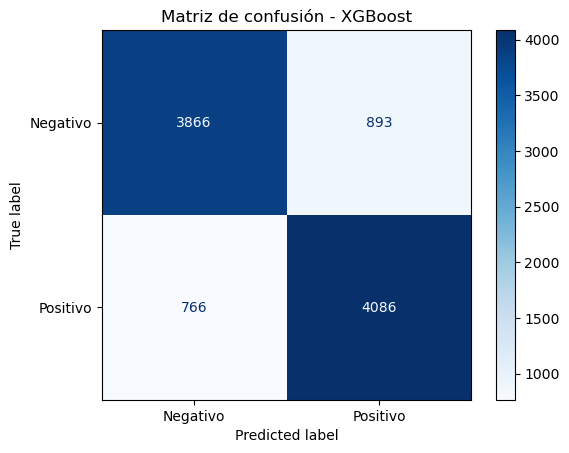

In [37]:
#Ahora probemos con un modelo de Xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Crear y entrenar el modelo XGBoost con paralelización
modeloXgboost = XGBClassifier(n_jobs=-1, random_state=42)  # Paralelización activa con n_jobs=-1
modeloXgboost.fit(X_train, y_train)

# Realizar predicciones
y_pred = modeloXgboost.predict(X_test)
y_proba = modeloXgboost.predict_proba(X_test)  # Probabilidades para cada clase

# Crear DataFrame con resultados detallados
resultados = pd.DataFrame({
    'Predicción': y_pred,
    'Probabilidad_Negativo': y_proba[:, 0].round(4) * 100,  # Convertir a porcentaje
    'Probabilidad_Positivo': y_proba[:, 1].round(4) * 100,
    'Confianza': np.max(y_proba, axis=1).round(4) * 100  # Máxima probabilidad (%)
})
# Mostrar las primeras predicciones con probabilidades
print("\nEjemplo de predicciones con confianza:")
print(resultados.head(10))

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo XGBoost: {accuracy:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión y su gráfica
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negativo", "Positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - XGBoost")
plt.show()

In [16]:
#Busquemos hiperparámetros para el modelo de XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],       # Número de árboles
    'max_depth': [3, 5, 7],                # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.1, 0.2],     # Tasa de aprendizaje
    'subsample': [0.8, 1.0],               # % Submuestreo de datos
    'colsample_bytree': [0.8, 1.0],        # % Submuestreo de features por árbol
    'gamma': [0, 0.1, 0.2],                # % Reducción mínima de pérdida para hacer splits
    'reg_alpha': [0, 0.1],                 # % Regularización L1
    'reg_lambda': [0, 0.1]                 # % Regularización L2
}

# Configurar el modelo base
modeloXgboost = XGBClassifier(
    objective='binary:logistic',  # Para clasificación binaria
    n_jobs=12,                   # Usar todos los núcleos
    random_state=42,
    eval_metric='logloss'        # Métrica de evaluación durante el entrenamiento
)

# Configurar la búsqueda de hiperparámetros con GridSearchCV

grid_search = GridSearchCV(
    estimator=modeloXgboost, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1,  # Paralelización total
    verbose=1
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el mejor modelo con los hiperparámetros seleccionados
best_modeloXgboost = grid_search.best_estimator_
y_pred = best_modeloXgboost.predict(X_test)
y_proba = best_modeloXgboost.predict_proba(X_test)  # Probabilidades para cada clase

# Crear DataFrame con resultados detallados
resultados = pd.DataFrame({
    'Predicción': y_pred,
    'Probabilidad_Negativo': y_proba[:, 0].round(4) * 100,  # Convertir a porcentaje
    'Probabilidad_Positivo': y_proba[:, 1].round(4) * 100,
    'Confianza': np.max(y_proba, axis=1).round(4) * 100  # Máxima probabilidad (%)
})
# Mostrar las primeras predicciones con probabilidades
print("\nEjemplo de predicciones con confianza:")
print(resultados.head(10))

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo XGBoost (ajustado): {accuracy:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión y su gráfica
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negativo", "Positivo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - XGBoost ajustado")
plt.show()

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


KeyboardInterrupt: 